In [24]:
from genesis.models.vanilla_autoencoder import VanillaVAE
from genesis.utils.helpers import visualize_bottleneck
from genesis.factories.datasets import DatasetFactory,DataLoaderFactory
from pathlib import Path
import torch

from notebooks.scratch import output

In [25]:
# prepare dataset
data_path = Path("../scripts/data")
dataset_factory = DatasetFactory(data_path=data_path)
datasets = dataset_factory.create_datasets()
dataloader_factory = DataLoaderFactory()
dataloaders = dataloader_factory.create_dataloaders(datasets_dict=datasets)

Created train dataset with 16396 samples from ..\scripts\data\train
Created val dataset with 5401 samples from ..\scripts\data\val
Created test dataset with 1425 samples from ..\scripts\data\test

Number of classes: 10
Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Created train dataloader: batch_size=500, num_batches=33, shuffle=True
Created val dataloader: batch_size=500, num_batches=11, shuffle=False
Created test dataloader: batch_size=500, num_batches=3, shuffle=False


In [26]:
# prepare model
model = VanillaVAE()
state_dict = torch.load("../scripts/experiments/vanilla autoencoder/best_model.pt")
model.load_state_dict(state_dict['model_state_dict'])

<All keys matched successfully>

C:\Users\BracklyMurunga\Desktop\AI SUNDAYS\genesis\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


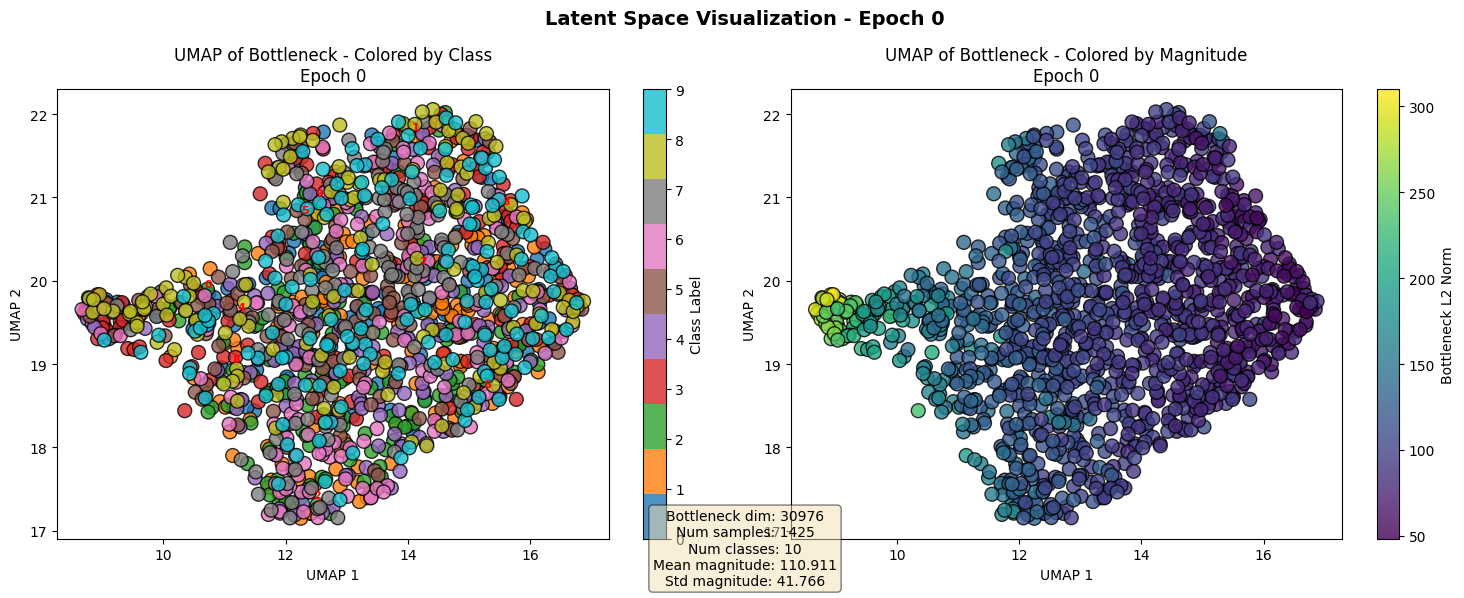

In [27]:
plt = visualize_bottleneck(model=model, dataloader=dataloaders["test"])

In [108]:
def plot_comparison(comparison,num_samples,normalize=False):
    grid = torchvision.utils.make_grid(comparison, nrow=len(num_samples), normalize=normalize)

    grid_np = grid.cpu().numpy().transpose((1, 2, 0))

    # Display
    plt.figure(figsize=(12, 6))
    plt.imshow(grid_np)
    plt.axis('off')
    plt.title('Top row: Original | Bottom row: Reconstructions')
    plt.show()

In [79]:
import torchvision
import random
for batch in dataloaders["test"]:
    inputs, labels = batch
    reconstructions, bottle_neck= model(inputs)
    break

num_samples = [random.randint(0,inputs.shape[0]-1) for _ in range(5)]

# Create comparison grid
comparison = torch.cat([inputs[num_samples], reconstructions[num_samples]], dim=0)




In [77]:
comparison.shape

torch.Size([10, 3, 224, 224])

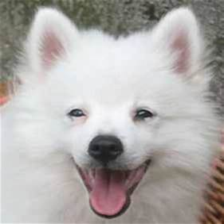

In [42]:
from torchvision.transforms import ToPILImage

def plot_image(image_tensor:torch.Tensor):
    to_pil = ToPILImage()
    return to_pil(image_tensor)

plot_image(inputs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-8.337989..9.121246].


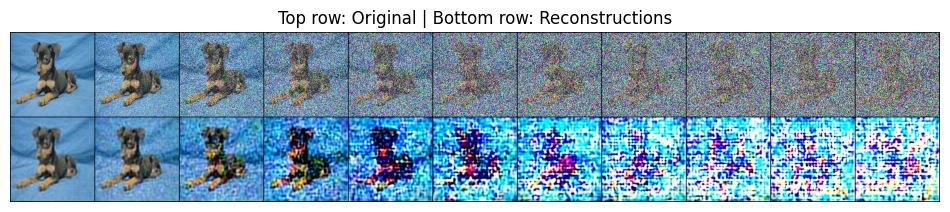

In [177]:
non_noisy_inputs = []
noisy_inputs = []
outputs = []
losses = []
trials= [0,2,4,6,8,10,12,14,16,18,20]
idx = random.randint(0,inputs.shape[0]-1)
for i in trials:
    noisy_image = inputs[idx] + (1e-1*i)*torch.randn_like(inputs[idx])
    noisy_inputs.append(noisy_image)
    output,_ = model(noisy_image)
    outputs.append(output.unsqueeze(0))


noisy_inputs = torch.cat(noisy_inputs,dim=0).view(len(trials),3,224,224)
outputs = torch.cat(outputs,dim=0).view(len(trials),3,224,224)
comparison = torch.cat([noisy_inputs,outputs], dim=0)
plot_comparison(comparison,num_samples=trials,normalize=False)


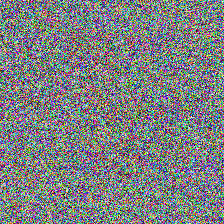

In [178]:
plot_image(noisy_inputs[2])


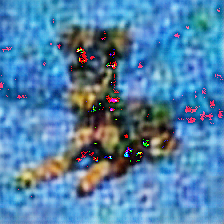

In [179]:
plot_image(outputs[2])